#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind,f_oneway,pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
housing=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [7]:
housing['CHAS']=housing['CHAS'].astype('int')

### Task 2: Descriptive Statistics

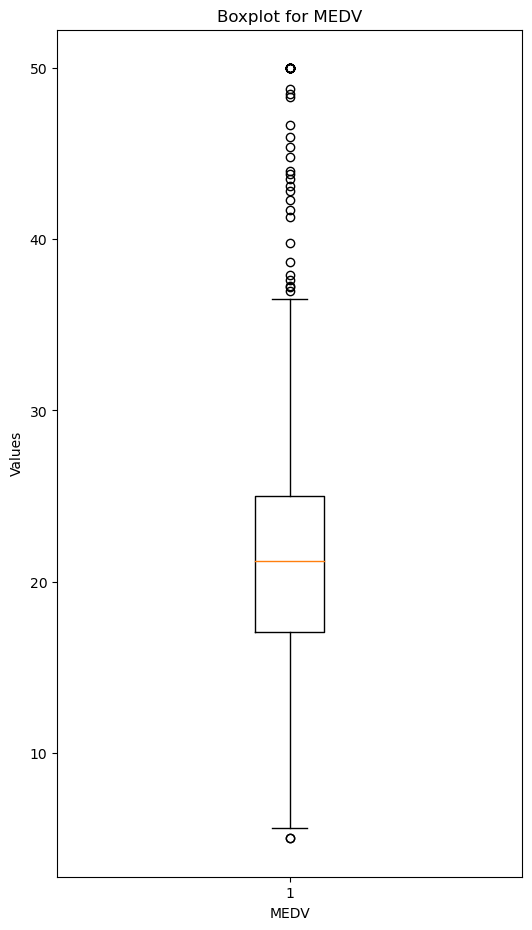

50.0

In [12]:
plt.figure(figsize=(6,11))
box =plt.boxplot(housing.MEDV)
plt.title("Boxplot for MEDV")
plt.ylabel("Values")
plt.xlabel("MEDV")
plt.show()
np.max(housing.MEDV)

Findings: The median of MEDV is around $21,000. Where we do have a lot of outliers on the side of the right whisker. The max. value (discluding any outliers) seems to be around $36,000 and the min. value around $5,000. Where the actual max. value is $50,000. The box does not seem too dispersed, hence, the data is not too dispersed. However, the range seems relatively large (max-min). And the red line seems to be relatively in the middle, leading to the assumption of a normal distribution.

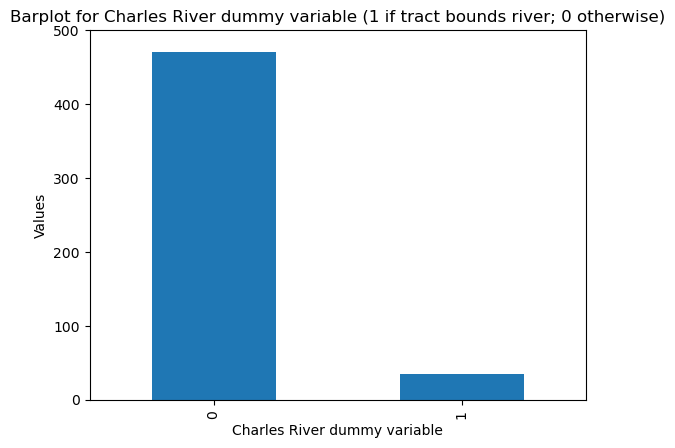

In [15]:
### Barplot of CHAS 
ax = housing['CHAS'].value_counts().plot(kind="bar")
plt.title("Barplot for Charles River dummy variable (1 if tract bounds river; 0 otherwise)")
plt.ylabel("Values")
plt.ylim(0,500)
plt.xlabel("Charles River dummy variable")
plt.show()

Findings: We can see that the Charles River being otherwise has almost 500 occasions, whereas for tract bounds river its around 25 occasions. Hence, the proportion of being 0 is huge compared to the 1s.

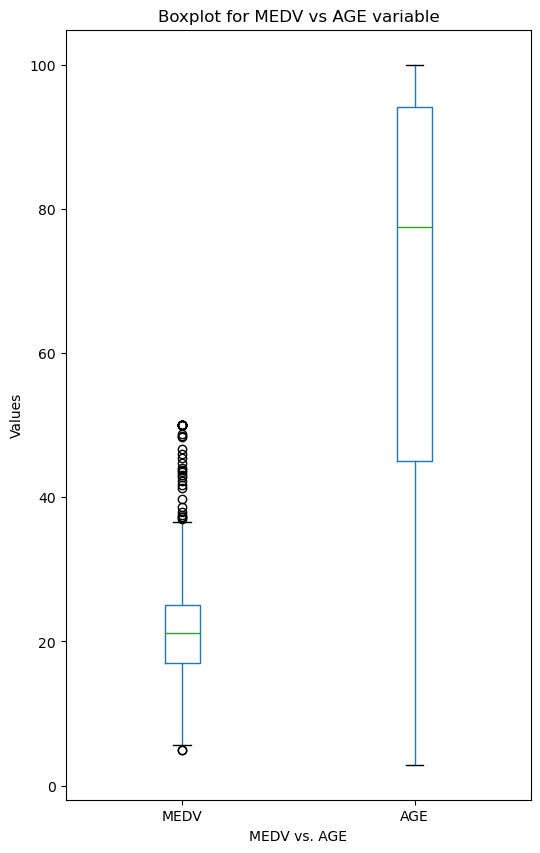

In [20]:
### Boxplot MEDV vs. AGE
#### Discretize the age var. into three groups 
bins = [-float('inf'),35,70,float('inf')]
labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
housing['AGE_disc']=pd.cut(housing['AGE'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(6,10))
housing[['MEDV','AGE']].boxplot(grid=False)
plt.title("Boxplot for MEDV vs AGE variable")
plt.ylabel("Values")
plt.xlabel("MEDV vs. AGE")
plt.show()

Findings: MEDV has a median of around $21,000. Please see first boxplot for description. For age, we can see that the median is below 80, probably around 78 years old. Where no outlier exists. The min. age is 3 years old with a long whisker. The range is around 97, which is large. Furthermore, the box is medium long, which may suggest a rather dispersed dataset, with a slightly positive skewed nature. 

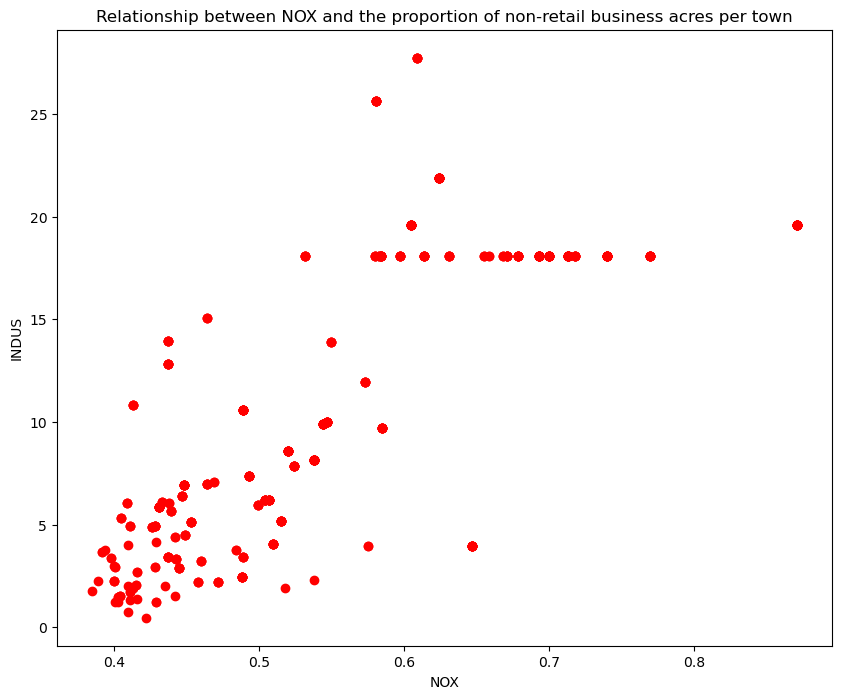

In [21]:
### Scatterplot 

plt.figure(figsize=(10,8))
plt.scatter(x=housing['NOX'], y=housing['INDUS'], color='red')
plt.title("Relationship between NOX and the proportion of non-retail business acres per town")
plt.ylabel("INDUS")
plt.xlabel("NOX")
plt.show()

Findings: We see an upward positive relation between both variables. When NOX increases slightly, INDUS proportion increases slightly when NOX values are between 0.38 and 0.53. When NOX is above around 0.5, this trend seems to be more upright and stronger. Causing a stronger increase in INDUS values. However, we do have relatively many outliers, when NOX levels are above approximately 0.65, where INDUS values just stay at a constant value of 18. Furthermore, we do have one extreme outlier when the NOX level is around 0.9

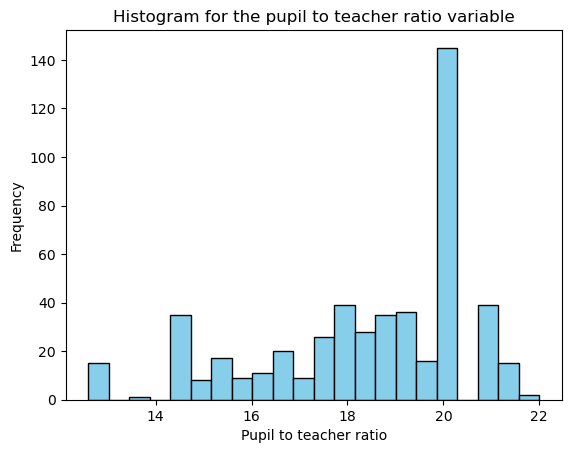

In [23]:
### Histogram for the pupil to teacher ratio variable

plt.hist(housing['PTRATIO'],bins=22,color='skyblue',edgecolor='black')
plt.title("Histogram for the pupil to teacher ratio variable")
plt.ylabel("Frequency")
plt.xlabel("Pupil to teacher ratio")
plt.show()

Findings: Most of the data is around the frequency of 10 to 40. We may assume a left-skewed distribution due to its large frequency at the end of the x-axis. 

# TASK 3: Tests

In [25]:
#Is there a significant difference?
#H0: No difference in median value of houses bounded by the Charles river.
#HA: There is a difference between both variables. 
alpha=0.05
ttest,pvalue = ttest_ind(housing['MEDV'],housing['CHAS'])
print("t-test",ttest)
print("p-value",pvalue)

if pvalue<alpha: 
    print("We reject H0 with a significance level of 5% as alpha is larger than the p-value. So, there is a statistically significance/difference in the median value of houses bounded by the Charles river.")
else:
        print("We fail to reject H0 with a significance level of 5% as alpha is not larger than the p-value. So, there is a statistically insignificance/indifference in the median value of houses bounded by the Charles river.")

t-test 54.9210289745203
p-value 1.4651540072350996e-305
We reject H0 with a significance level of 5% as alpha is larger than the p-value. So, there is a statistically significance/difference in the median value of houses bounded by the Charles river.


In [ ]:
#Is there a significant difference?
#H0: No difference in median value of houses bounded by the Charles river.
#HA: There is a difference between both variables. 
alpha=0.05
ttest,pvalue = ttest_ind(housing['MEDV'],housing['CHAS'])
print("t-test",ttest)
print("p-value",pvalue)

if pvalue<alpha: 
    print("We reject H0 with a significance level of 5% as alpha is larger than the p-value. So, there is a statistically significance/difference in the median value of houses bounded by the Charles river.")
else:
        print("We fail to reject H0 with a significance level of 5% as alpha is not larger than the p-value. So, there is a statistically insignificance/indifference in the median value of houses bounded by the Charles river.")

In [26]:
#Is there a significant difference in MEDV for each proportion of owner occupied units built prior 1940?
#H0: The means of both groups are the same. So, we have an indifference in means. 
#HA: The means of both groups are not the same. So, we have difference in means. 
alpha=0.05
ftest,pvalue = f_oneway(housing['MEDV'],housing['AGE'])
print("F-test",ftest)
print("F-tests p-value",pvalue)

if pvalue<alpha: 
    print("We reject H0 with a significance level of 5% as alpha is larger than the p-value. So, there is a statistically significance/difference in the means of both groups.")
else:
        print("We fail to reject H0 with a significance level of 5% as alpha is not larger than the p-value. So, there is a statistically insignificance/non-difference in the means of both groups.")

F-test 1223.1740271875933
F-tests p-value 3.20946197250671e-176
We reject H0 with a significance level of 5% as alpha is larger than the p-value. So, there is a statistically significance/difference in the means of both groups.


In [29]:
#Can we conclude there is no relation btw. NOX and INDUS?
#H0: rho=0
#HA: rho != 0
alpha=0.05
corr_r,pvalue = pearsonr(housing['NOX'],housing['INDUS'])
print("Pearsons rho",corr_r)
print("Pearsons p-value",pvalue)

if pvalue<alpha: 
    print("We reject H0 with a significance level of 5% as alpha is larger than the p-value. So, rho is not equal to 0 and a positive linear correlation exists between both variables. We have here a strong relationship.")
else:
    print("We fail to reject H0 with a significance level of 5% as alpha is not larger than the p-value. So, rho is equal to 0 and no correlation exists between the two variables. ")
        

#Statement above is false. There is a relation between NOX and proportion of non-retail business acres per town. 

Pearsons rho 0.7636514469209157
Pearsons p-value 7.913361061236247e-98
We reject H0 with a significance level of 5% as alpha is larger than the p-value. So, rho is not equal to 0 and a positive linear correlation exists between both variables. We have here a strong relationship.


In [33]:
#Whats the impact of an additional weighted distance to the 5 Boston employment centres on the median value of owner occupied homes? (regression)
#H0: beta1=0
#HA: beta1 !=0 --> two-tailed test 

beta = sm.add_constant(housing['DIS'])
reg =sm.OLS(housing['MEDV'],beta).fit()
print(reg.summary())

print("The p-value of DIS is 0, which is larger than the alpha 5%. Hence, we fail to reject H0 at a 5% significance level and can say that DIS is statistically insignificant. Thus, there is no statistical linear relationship between DIS and MEDV (y) and therefore, no impact of one additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. The intercept is also insignificant.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        15:57:07   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0